# Raw Data Dictionary

This notebook contains information related to the datasets extracted from the [official IMDb datasets](https://developer.imdb.com/non-commercial-datasets/).

## Original ER Model

See the original structure of the IMDb datasets. The tables and descriptions showcased here are directly obtained from the IMDb website, reflecting the original structure of the tables without any alterations. The following diagram represents my interpretation of the datasets.

Please note that not all tables from the IMDb website were included in this representation. Only the tables deemed relevant for my specific analysis were extracted. For a comprehensive view of the available tables, you please refer to the [official IMDb datasets](https://developer.imdb.com/non-commercial-datasets/).

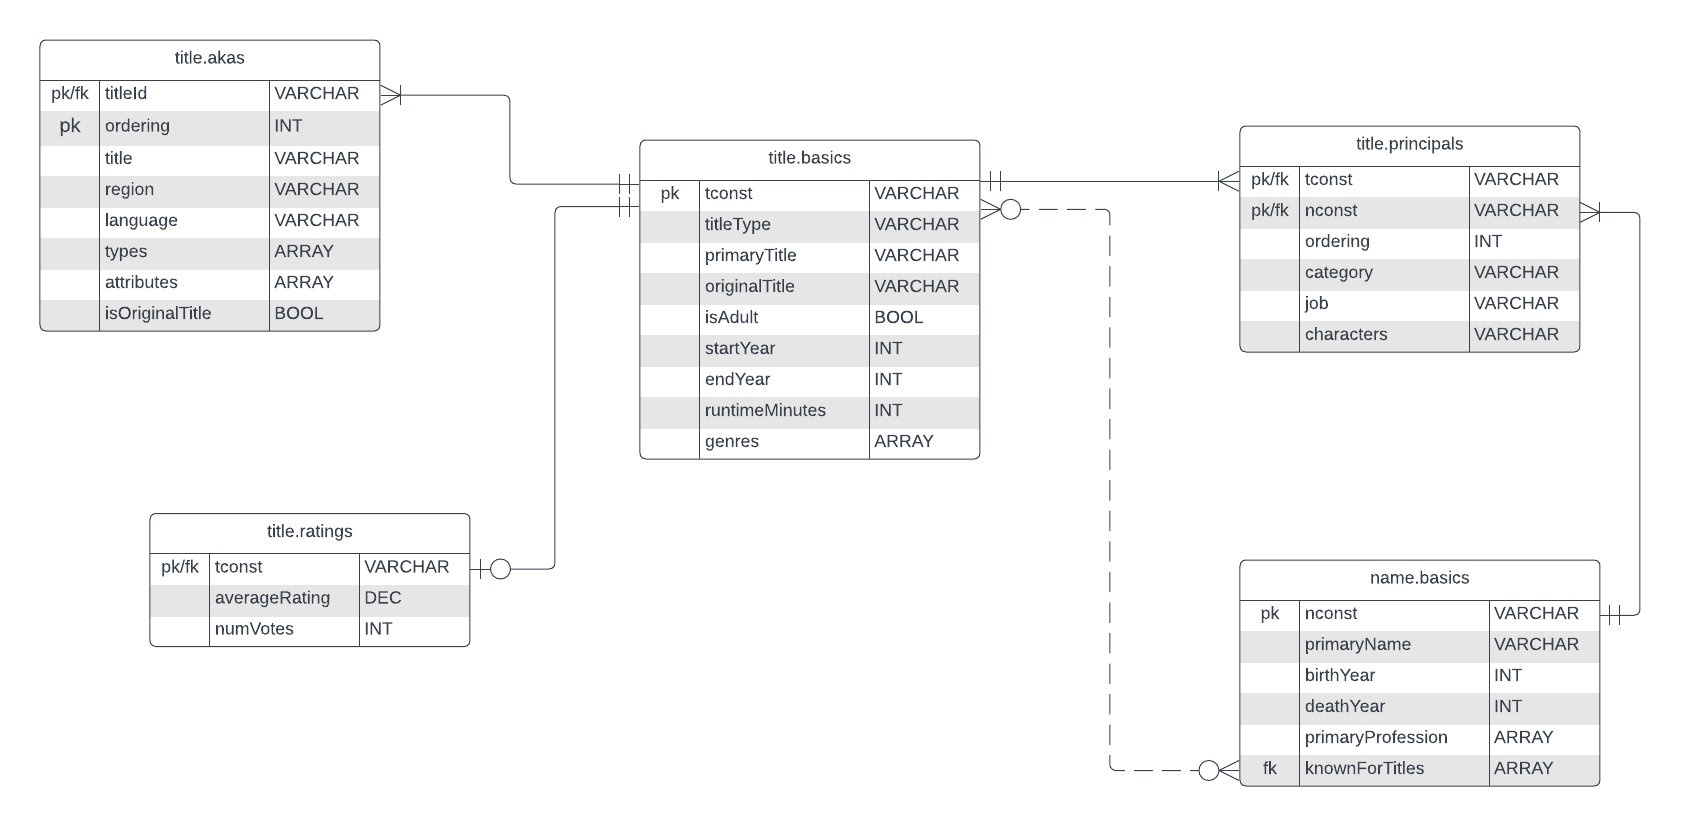

---

## Tables and Descriptions

### title.basics
Data related to all titles in IMDB database. Includes movies, tv show episodes, live action plays, etc.

__Columns__

- tconst (string) - alphanumeric unique identifier of the title
- titleType (string) – the type/format of the title (e.g. movie, short, tvseries, tvepisode, video, etc)
- primaryTitle (string) – the more popular title / the title used by the filmmakers on promotional materials at the point of release
- originalTitle (string) - original title, in the original language
- isAdult (boolean) - 0: non-adult title; 1: adult title
- startYear (YYYY) – represents the release year of a title. In the case of TV Series, it is the series start year.
- endYear (YYYY) – TV Series end year. ‘\N’ for all other title types
- runtimeMinutes – primary runtime of the title, in minutes
- genres (string array) – includes up to three genres associated with the title

In [9]:
# Sample Output
titles_df.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


### name.basics
Data related to all individuals who have participated in the production of a title. Includes actors/actresses, writers, directors, costume designers, etc.

__Columns__
- nconst (string) - alphanumeric unique identifier of the name/person
- primaryName (string)– name by which the person is most often credited
- birthYear – in YYYY format
- deathYear – in YYYY format if applicable, else '\N'
- primaryProfession (array of strings)– the top-3 professions of the person
- knownForTitles (array of tconsts) – titles the person is known for

In [10]:
names_df.head()

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0031983,tt0072308,tt0053137,tt0050419"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0075213,tt0038355,tt0037382,tt0117057"
2,nm0000003,Brigitte Bardot,1934,\N,"actress,soundtrack,music_department","tt0057345,tt0056404,tt0054452,tt0049189"
3,nm0000004,John Belushi,1949,1982,"actor,soundtrack,writer","tt0080455,tt0072562,tt0077975,tt0078723"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0050976,tt0050986,tt0069467,tt0083922"


### title.principals
Mapping table between the name.basics table and title.basics table. A record exists for every individual involved in a title.


__Columns__
- tconst (string) - alphanumeric unique identifier of the title
- ordering (integer) – a number to uniquely identify rows for a given titleId
- nconst (string) - alphanumeric unique identifier of the name/person
- category (string) - the category of job that person was in
- job (string) - the specific job title if applicable, else '\N'
- characters (string) - the name of the character played if applicable, else '\N'

In [11]:
principals_df.head()

,tconst,ordering,nconst,category,job,characters
0,tt0000001,1,nm1588970,self,\N,"[""Self""]"
1,tt0000001,2,nm0005690,director,\N,\N
2,tt0000001,3,nm0374658,cinematographer,director of photography,\N
3,tt0000002,1,nm0721526,director,\N,\N
4,tt0000002,2,nm1335271,composer,\N,\N


### title.ratings
Contains the average rating and number of votes for records in the "titles" Table. This is a one-to-one optional relationship, meaning an individual title could have a max of one record in the "ratings" table, but could not have one as well. Since this is a one-to-one relationship, these two tables should be combined.


__Columns__
- tconst (string) - alphanumeric unique identifier of the title
- averageRating (decimal) – weighted average of all the individual user ratings
- numVotes (integer) - number of votes the title has received

In [12]:
ratings_df.head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,1982
1,tt0000002,5.8,265
2,tt0000003,6.5,1839
3,tt0000004,5.5,178
4,tt0000005,6.2,2625


### title.akas

Contains all alternative titles for a local region/country for each unique record in "title.basics" table.

__Columns__

- titleId (string) - a tconst, an alphanumeric unique identifier of the title
- ordering (integer) – a number to uniquely identify rows for a given titleId
- title (string) – the localized title
- region (string) - the region for this version of the title
- language (string) - the language of the title
- types (array) - Enumerated set of attributes for this alternative title. One or more of the following: "alternative", "dvd", "festival", "tv", "video", "working", - "original", "imdbDisplay". New values may be added in the future without warning
- attributes (array) - Additional terms to describe this alternative title, not enumerated
- isOriginalTitle (boolean) – 0: not original title; 1: original title

In [14]:
akas_df.head()

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,1,Карменсіта,UA,\N,imdbDisplay,\N,0
1,tt0000001,2,Carmencita,DE,\N,\N,literal title,0
2,tt0000001,3,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0
3,tt0000001,4,Καρμενσίτα,GR,\N,imdbDisplay,\N,0
4,tt0000001,5,Карменсита,RU,\N,imdbDisplay,\N,0
